In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.corr(numeric_only=True)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
from sklearn.impute import SimpleImputer

bmi_imputer = SimpleImputer(strategy='mean')


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # No fitting needed (stateless transformer)
        return self
    def transform(self,X,y=None):
        X['gender']=(X['gender']=='Male').astype(int)
        X['ever_married']=(X['ever_married']=='Yes').astype(int)
        X['Residence_type']=(X['Residence_type']=='Urban').astype(int)

        X['bmi_missing'] = X['bmi'].isna().astype(int)

        X['age_group']=pd.cut(X['age'],bins=[0,40,50,60,70,80],labels=['<40', '40-50', '50-60', '60-70', '70+'])

        X['high_glucose'] = (X['avg_glucose_level'] > 140).astype(int)
        X['obese'] = (X['bmi'] >= 30).astype(int)

        X['risk_factor_count'] = (
            X['hypertension'] +
            X['heart_disease'] +
            X['high_glucose'] +
            X['obese']
        )
        return X






In [ ]:
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],stratify=df.iloc[:,-1])

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1170,Female,80.00,0,0,Yes,Private,Rural,75.62,25.1,smokes
2971,Female,21.00,0,0,No,Private,Rural,71.06,25.3,formerly smoked
4433,Female,21.00,0,0,No,Private,Urban,58.66,31.3,never smoked
4267,Male,36.00,0,0,Yes,Private,Rural,119.90,37.6,never smoked
2173,Female,67.00,1,0,Yes,Private,Urban,90.01,34.4,smokes
...,...,...,...,...,...,...,...,...,...,...
3031,Male,2.00,0,1,No,children,Urban,62.89,29.4,Unknown
1101,Male,1.64,0,0,No,children,Urban,56.30,19.7,Unknown
4688,Male,31.00,0,0,No,Self-employed,Rural,64.85,23.0,Unknown
3346,Female,45.00,0,0,Yes,Private,Rural,92.21,31.0,never smoked


In [ ]:
X_train['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

<Axes: ylabel='bmi'>

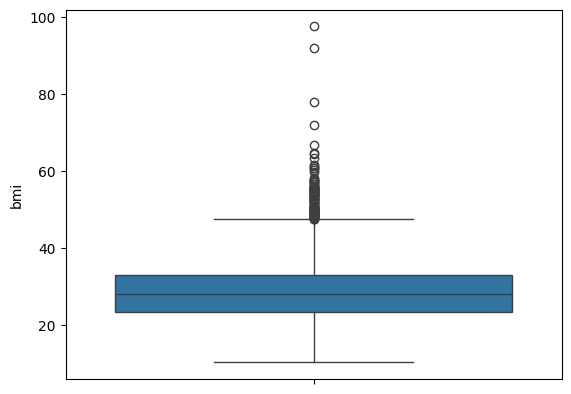

In [ ]:
import seaborn as sns
sns.boxplot(df['bmi'])

In [ ]:
imputation_skewness_scaling_cols=['avg_glucose_level','bmi']
scaling_cols=['age','risk_factor_count']
ordinal_scaling_cols=['smoking_status','age_group']
nominal_cols=['work_type']
sorted_cols=['gender','hypertension','heart_disease','ever_married','Residence_type','bmi_missing','high_glucose','obese']

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,OrdinalEncoder,StandardScaler,OneHotEncoder

In [ ]:
X_train['smoking_status'].unique()

array(['smokes', 'formerly smoked', 'never smoked', 'Unknown'],
      dtype=object)

In [ ]:
class SkewnessWrapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.transformers_ = []
        for i in range(X.shape[1]):
            pt = PowerTransformer(method='yeo-johnson', standardize=False)
            pt.fit(X[:, [i]])
            self.transformers_.append(pt)
        return self

    def transform(self, X):
        X_out = np.zeros_like(X, dtype=float)
        for i, pt in enumerate(self.transformers_):
            X_out[:, i] = pt.transform(X[:, [i]]).ravel()
        return X_out


In [ ]:
imputation_skewness_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('skew', SkewnessWrapper()),
    ('scaler', StandardScaler())
])

scaling_pipeline=Pipeline([('tnf1',StandardScaler())])
ordinal_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(
        categories=[
            ['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
            ['<40', '40-50', '50-60', '60-70', '70+']
        ],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
    ('scaler', StandardScaler())
])
nominal_pipeline = Pipeline([
    ('encoder', OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False
    ))
])

binary_pipeline = Pipeline([
    ('identity', FunctionTransformer(
        lambda X: X,
        validate=False
    ))
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
preprocess=ColumnTransformer([
    ('imputation_skewness',imputation_skewness_pipeline,imputation_skewness_scaling_cols),
    ('tnf2',scaling_pipeline,scaling_cols),
    ('tnf3',ordinal_pipeline,ordinal_scaling_cols),
    ('tnf4',nominal_pipeline,nominal_cols),
    ('tnf5',binary_pipeline,sorted_cols)
])

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
def objective1(trial):

    model_ = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        max_depth=trial.suggest_int('max_depth', 2, 32),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        max_samples=trial.suggest_float("max_samples", 0.35, 0.7),
        bootstrap=True,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    )

    model = Pipeline(steps=[
        ('feature', FeatureEngineer()),
        ('preprocess', preprocess),
        ('ros', RandomOverSampler(random_state=42)),
        ('model', model_)
    ])

    score = cross_val_score(model, X_train, y_train, cv=3, scoring="recall").mean()
    return score

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import optuna

study1 = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)  # create sampler object here
)


[I 2025-12-15 14:08:02,503] A new study created in memory with name: no-name-4dbd5389-5af3-46b5-8d41-280d1d3ef0ed


In [ ]:
study1.optimize(objective1,n_trials=30)

[I 2025-12-15 14:08:06,890] Trial 0 finished with value: 0.555726233145588 and parameters: {'n_estimators': 250, 'max_depth': 31, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.3703292642588698}. Best is trial 0 with value: 0.555726233145588.
[I 2025-12-15 14:08:14,449] Trial 1 finished with value: 0.16555726233145587 and parameters: {'n_estimators': 447, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.42431868873739664}. Best is trial 0 with value: 0.555726233145588.
[I 2025-12-15 14:08:16,971] Trial 2 finished with value: 0.6573647380098993 and parameters: {'n_estimators': 172, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.5641485131528328}. Best is trial 2 with value: 0.6573647380098993.
[I 2025-12-15 14:08:19,479] Trial 3 finished with value: 0.42737668544120155 and parameters: {'n_estimators': 155, 'max_depth': 11, 'min_samples

In [ ]:
best_params = study1.best_trial.params
best_score  = study1.best_trial.value

print("Best CV Recall:", best_score)
print("Best Params:", best_params)


Best CV Recall: 0.8608977641235707
Best Params: {'n_estimators': 356, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.6066194205415822}


In [ ]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective2(trial):

    model_ = XGBClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        max_depth=trial.suggest_int('max_depth', 2, 10),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        subsample=trial.suggest_float('subsample', 0.6, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
        min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
        gamma=trial.suggest_float('gamma', 0, 5),
        reg_alpha=trial.suggest_float('reg_alpha', 0, 5),
        reg_lambda=trial.suggest_float('reg_lambda', 0, 5),
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=1,   # IMPORTANT when using RandomOverSampler
        random_state=42,
        n_jobs=-1
    )

    model = Pipeline(steps=[
        ('feature', FeatureEngineer()),
        ('preprocess', preprocess),
        ('ros', RandomOverSampler(random_state=42)),
        ('model', model_)
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring='recall',
        n_jobs=-1
    ).mean()

    return score

In [ ]:
study2 = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)  # create sampler object here
)

[I 2025-12-15 14:01:02,473] A new study created in memory with name: no-name-86dfbb37-a12b-451a-acac-9dc58f4200e8


In [ ]:
study2.optimize(objective2,n_trials=30)

[I 2025-12-15 14:01:34,988] Trial 0 finished with value: 0.27308414405188597 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 4.330880728874676, 'reg_lambda': 3.005575058716044}. Best is trial 0 with value: 0.27308414405188597.
[I 2025-12-15 14:01:35,542] Trial 1 finished with value: 0.47072879330943845 and parameters: {'n_estimators': 383, 'max_depth': 2, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 1.5212112147976886, 'reg_lambda': 2.6237821581611893}. Best is trial 1 with value: 0.47072879330943845.
[I 2025-12-15 14:01:36,082] Trial 2 finished with value: 0.5671616316777607 and parameters: {'n_estimators': 273, 'max_depth': 4, 'learning_rate': 0.08012737503998542, 'subsample': 

In [ ]:
best_params = study2.best_trial.params
best_score  = study2.best_trial.value

print("Best CV Recall:", best_score)
print("Best Params:", best_params)


Best CV Recall: 0.8342720600785117
Best Params: {'n_estimators': 147, 'max_depth': 2, 'learning_rate': 0.024868481722832902, 'subsample': 0.6435148102804202, 'colsample_bytree': 0.8990091579885573, 'min_child_weight': 3, 'gamma': 1.4167790393512618, 'reg_alpha': 2.6850925012768574, 'reg_lambda': 0.010917292071241647}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

final_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_samples=best_params['max_samples'],
    bootstrap=True,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

final_pipeline = Pipeline(steps=[
    ('feature', FeatureEngineer()),
    ('preprocess', preprocess),
    ('ros', RandomOverSampler(random_state=42)),
    ('model', final_rf)
])


In [ ]:
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('feature', FeatureEngineer()),
                ('preprocess',
                 ColumnTransformer(transformers=[('imputation_skewness',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('skew',
                                                                   SkewnessWrapper()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('tnf2',
                                                  Pipeline(steps=[('tnf1',
                                                                   StandardScaler())]),
                                                  ['age', 'risk_factor_count']),
                                                 ('tnf3',
                                                  Pipeline(steps=[...
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married',
                                                   'Residence_type',
                                                   'bmi_missing',
                                                   'high_glucose',
                                                   'obese'])])),
                ('ros', RandomOverSampler(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=2, max_features='log2',
                                        max_samples=0.6066194205415822,
                                        min_samples_leaf=3,
                                        min_samples_split=10, n_estimators=356,
                                        n_jobs=-1, random_state=42))])

In [ ]:
from sklearn.metrics import recall_score, precision_score, classification_report

y_pred = final_pipeline.predict(X_test)
y_prob = final_pipeline.predict_proba(X_test)[:, 1]

print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Recall: 0.9032258064516129
Precision: 0.11522633744855967
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      1216
           1       0.12      0.90      0.20        62

    accuracy                           0.66      1278
   macro avg       0.55      0.77      0.49      1278
weighted avg       0.95      0.66      0.75      1278



In [ ]:
y_prob = final_pipeline.predict_proba(X_test)[:, 1]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score

thresholds = np.linspace(0.05, 0.95, 50)

rows = []
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    rows.append({
        "threshold": round(t, 3),
        "recall": recall_score(y_test, y_pred_t),
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "f1": f1_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(rows)
threshold_df


,threshold,recall,precision,f1
0,0.050,1.000000,0.048513,0.092537
1,0.068,1.000000,0.048513,0.092537
2,0.087,1.000000,0.048513,0.092537
3,0.105,1.000000,0.048513,0.092537
4,0.123,1.000000,0.048513,0.092537
5,0.142,1.000000,0.048513,0.092537
6,0.160,1.000000,0.051883,0.098648
7,0.179,1.000000,0.053448,0.101473
8,0.197,1.000000,0.055705,0.105532
9,0.215,1.000000,0.058657,0.110813


In [ ]:
threshold_df[threshold_df["recall"] >= 0.90] \
    .sort_values("precision", ascending=False) \
    .head(5)


,threshold,recall,precision,f1
21,0.436,0.967742,0.109689,0.197044
22,0.454,0.951613,0.109259,0.196013
23,0.472,0.919355,0.109195,0.195205
20,0.417,0.967742,0.108893,0.195759
19,0.399,0.967742,0.108696,0.195440


In [ ]:
FINAL_THRESHOLD = 0.436

y_pred_final = (y_prob >= FINAL_THRESHOLD).astype(int)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Final Threshold:", FINAL_THRESHOLD)
print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))


Final Threshold: 0.436
              precision    recall  f1-score   support

           0       1.00      0.60      0.75      1216
           1       0.11      0.97      0.20        62

    accuracy                           0.62      1278
   macro avg       0.55      0.78      0.47      1278
weighted avg       0.95      0.62      0.72      1278

[[729 487]
 [  2  60]]


In [ ]:
FINAL_THRESHOLD = 0.436

def predict_stroke(
    gender,
    age,
    hypertension,
    heart_disease,
    ever_married,
    work_type,
    Residence_type,
    avg_glucose_level,
    bmi,
    smoking_status
):
    import pandas as pd

    input_df = pd.DataFrame([{
        "gender": gender,
        "age": age,
        "hypertension": hypertension,
        "heart_disease": heart_disease,
        "ever_married": ever_married,
        "work_type": work_type,
        "Residence_type": Residence_type,
        "avg_glucose_level": avg_glucose_level,
        "bmi": bmi,
        "smoking_status": smoking_status
    }])

    prob = final_pipeline.predict_proba(input_df)[0, 1]

    # Risk banding
    if prob < 0.25:
        risk = "LOW Risk"
    elif prob < FINAL_THRESHOLD:
        risk = "MODERATE Risk"
    elif prob < 0.70:
        risk = "HIGH Risk"
    else:
        risk = "EXTREME HIGH Risk"

    return {
        "Risk Category": risk,
        "Stroke Probability": round(prob, 3),
        "Decision Threshold": FINAL_THRESHOLD,
        "Clinical Note": (
            "This is a screening model. "
            "High or Extreme High risk should be followed by medical evaluation."
        )
    }


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict_stroke,

    inputs=[
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Slider(0, 100, value=50, label="Age"),
        gr.Radio([0, 1], label="Hypertension (0 = No, 1 = Yes)"),
        gr.Radio([0, 1], label="Heart Disease (0 = No, 1 = Yes)"),
        gr.Radio(["Yes", "No"], label="Ever Married"),
        gr.Dropdown(
            ["Private", "Self-employed", "Govt_job", "children", "Never_worked"],
            label="Work Type"
        ),
        gr.Radio(["Urban", "Rural"], label="Residence Type"),
        gr.Slider(50, 300, value=100, label="Average Glucose Level"),
        gr.Slider(10, 60, value=25, label="BMI"),
        gr.Dropdown(
            ["never smoked", "formerly smoked", "smokes", "Unknown"],
            label="Smoking Status"
        )
    ],

    outputs=gr.JSON(label="Prediction Output"),

    title="Stroke Risk Prediction (Healthcare ML)",
    description=(
        "Recall-focused stroke screening model.\n"
        "Threshold tuned to minimize false negatives.\n\n"
        f"Decision Threshold = {FINAL_THRESHOLD}"
    )
)


In [ ]:
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://657b1672c233fbabd6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
